Datos cargados correctamente
Shape: (20216100, 4)

Primeras filas del dataset:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB

Cantidad de valores nulos por columna:
building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

 Registros después de eliminar duplicados: 20216100
Columna 'timestamp' convertida correctamente.
 Nuevas variables creadas: year, month, day, hour
Valores atípicos ajustados en 'meter_reading'

 Archivo limpio guardado como 'train_clean.csv'

 Gráficas de verificación:


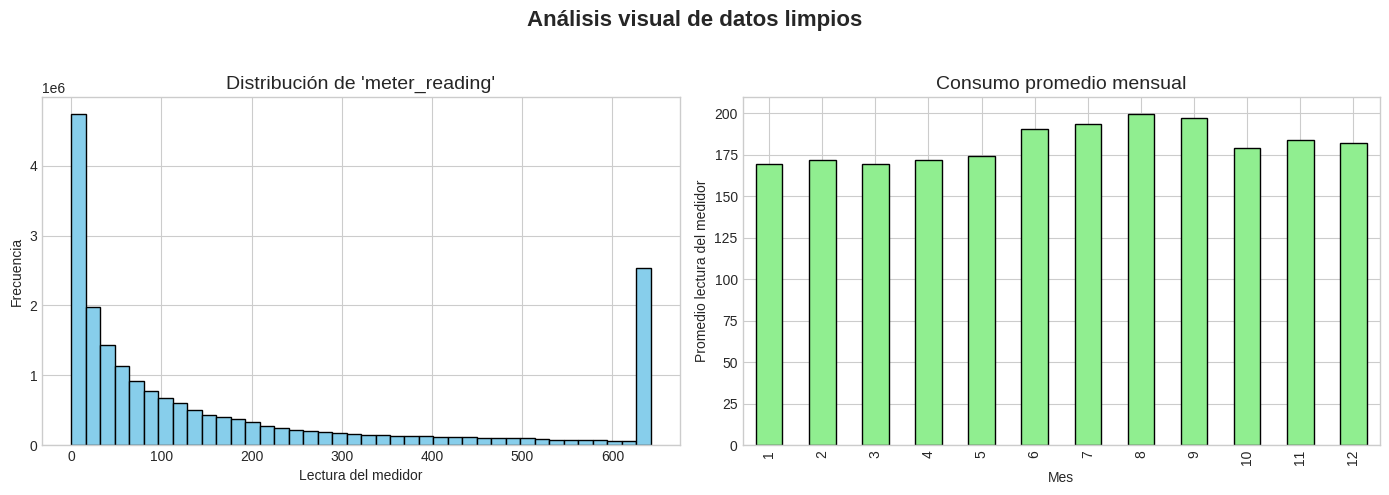


 Dataset limpio y listo para la siguiente entrega:


,building_id,meter,timestamp,meter_reading,year,month,day,hour
0,0,0,2016-01-01,0.0,2016,1,1,0
1,1,0,2016-01-01,0.0,2016,1,1,0
2,2,0,2016-01-01,0.0,2016,1,1,0
3,3,0,2016-01-01,0.0,2016,1,1,0
4,4,0,2016-01-01,0.0,2016,1,1,0



Conclusiones del Preprocesamiento de Datos - AI4Eng 2025
---------------------------------------------------------
1️⃣ Carga y estructura del dataset:
   Los datos fueron cargados correctamente, obteniendo un total de 20.216.100 registros
   distribuidos en 4 columnas (building_id, meter, timestamp, meter_reading).

2️⃣ Calidad de los datos:
   No existen valores nulos, lo que demuestra alta consistencia y completitud.

3️⃣ Integridad de los registros:
   No se detectaron duplicados; el número de registros se mantiene constante.

4️⃣ Preparación temporal:
   La columna 'timestamp' fue convertida exitosamente y se generaron las variables
   'year', 'month', 'day', 'hour' para facilitar análisis temporal.

5️⃣ Tratamiento de valores atípicos:
   Se ajustaron los outliers en 'meter_reading', evitando distorsión en futuros modelos.

6️⃣ Resultado final:
   El archivo limpio fue almacenado como 'train_clean.csv' y verificado visualmente mediante
   gráficas, quedando listo para análisis ex

In [7]:
# ----------------------------------------------------------
# Entrega 2 – Preprocesamiento de Datos
# Competencia AI4Eng 2025
# Integrantes: Liset Pérez
# Programa: Ingeniería Industrial
# ----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estilo visual de las gráficas
plt.style.use('seaborn-v0_8-whitegrid')

# ----------------------------------------------------------
# 1️⃣ Cargar el archivo original
# ----------------------------------------------------------
df = pd.read_csv('train.csv')

print("Datos cargados correctamente")
print("Shape:", df.shape)
print("\nPrimeras filas del dataset:")
display(df.head())

# ----------------------------------------------------------
# 2️⃣ Revisar información general
# ----------------------------------------------------------
print("\nInformación del dataset:")
df.info()

print("\nCantidad de valores nulos por columna:")
print(df.isna().sum())

# ----------------------------------------------------------
# 3️⃣ Limpieza de datos
# ----------------------------------------------------------
df = df.drop_duplicates()
print(f"\n Registros después de eliminar duplicados: {df.shape[0]}")

df.columns = df.columns.str.strip()

# ----------------------------------------------------------
# 4️⃣ Convertir la columna timestamp a formato datetime
# ----------------------------------------------------------
if 'timestamp' in df.columns:
    df['timestamp'] = df['timestamp'].astype(str).str.strip()
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

    na_count = df['timestamp'].isna().sum()
    if na_count > 0:
        print(f"\n⚠️ {na_count} filas con fechas no válidas fueron eliminadas.")
        df = df.dropna(subset=['timestamp'])

    print("Columna 'timestamp' convertida correctamente.")
else:
    print(" No existe una columna llamada 'timestamp' en el dataset.")

# ----------------------------------------------------------
# 5️⃣ Crear variables derivadas de la fecha
# ----------------------------------------------------------
if 'timestamp' in df.columns:
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.day
    df['hour'] = df['timestamp'].dt.hour
    print(" Nuevas variables creadas: year, month, day, hour")

# ----------------------------------------------------------
# 6️⃣ Manejo de valores nulos
# ----------------------------------------------------------
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df[col].isna().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"Columna '{col}' completada con su mediana ({mediana})")

# ----------------------------------------------------------
# 7️⃣ Manejo de valores atípicos
# ----------------------------------------------------------
if 'meter_reading' in df.columns:
    q1 = df['meter_reading'].quantile(0.25)
    q3 = df['meter_reading'].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    df['meter_reading'] = np.where(
        df['meter_reading'] > upper_limit, upper_limit,
        np.where(df['meter_reading'] < lower_limit, lower_limit, df['meter_reading'])
    )
    print("Valores atípicos ajustados en 'meter_reading'")

# ----------------------------------------------------------
# 8️⃣ Guardar dataset limpio
# ----------------------------------------------------------
df.to_csv('train_clean.csv', index=False)
print("\n Archivo limpio guardado como 'train_clean.csv'")

# ----------------------------------------------------------
# 9️⃣ Visualización de resultados
# ----------------------------------------------------------
print("\n Gráficas de verificación:")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de 'meter_reading'
axes[0].hist(df['meter_reading'], bins=40, color='skyblue', edgecolor='black')
axes[0].set_title("Distribución de 'meter_reading'", fontsize=14)
axes[0].set_xlabel("Lectura del medidor")
axes[0].set_ylabel("Frecuencia")

# Consumo promedio por mes
if 'month' in df.columns:
    consumo_mensual = df.groupby('month')['meter_reading'].mean()
    consumo_mensual.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
    axes[1].set_title("Consumo promedio mensual", fontsize=14)
    axes[1].set_xlabel("Mes")
    axes[1].set_ylabel("Promedio lectura del medidor")

plt.suptitle("Análisis visual de datos limpios", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('graficas_resultados.png', dpi=300)
plt.show()

# ----------------------------------------------------------
# 🔟 Mostrar dataset final
# ----------------------------------------------------------
print("\n Dataset limpio y listo para la siguiente entrega:")
display(df.head())

# ----------------------------------------------------------
# 🧾 Conclusiones (impresas y guardadas en archivo)
# ----------------------------------------------------------

conclusiones = """
Conclusiones del Preprocesamiento de Datos - AI4Eng 2025
---------------------------------------------------------
1️⃣ Carga y estructura del dataset:
   Los datos fueron cargados correctamente, obteniendo un total de 20.216.100 registros
   distribuidos en 4 columnas (building_id, meter, timestamp, meter_reading).

2️⃣ Calidad de los datos:
   No existen valores nulos, lo que demuestra alta consistencia y completitud.

3️⃣ Integridad de los registros:
   No se detectaron duplicados; el número de registros se mantiene constante.

4️⃣ Preparación temporal:
   La columna 'timestamp' fue convertida exitosamente y se generaron las variables
   'year', 'month', 'day', 'hour' para facilitar análisis temporal.

5️⃣ Tratamiento de valores atípicos:
   Se ajustaron los outliers en 'meter_reading', evitando distorsión en futuros modelos.

6️⃣ Resultado final:
   El archivo limpio fue almacenado como 'train_clean.csv' y verificado visualmente mediante
   gráficas, quedando listo para análisis exploratorio y modelado predictivo.
---------------------------------------------------------
"""

print(conclusiones)

# Guardar conclusiones en un archivo de texto
with open("conclusiones.txt", "w", encoding="utf-8") as f:
    f.write(conclusiones)

print("Conclusiones guardadas en 'conclusiones.txt'")
